In [494]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/time-series-datasets/Electric_Production.csv
/kaggle/input/time-series-datasets/monthly-beer-production-in-austr.csv
/kaggle/input/time-series-datasets/sales-of-shampoo-over-a-three-ye.csv
/kaggle/input/time-series-datasets/daily-minimum-temperatures-in-me.csv


In [495]:
train=pd.read_csv("/kaggle/input/time-series-datasets/Electric_Production.csv")

In [496]:
len(train)

397

In [497]:
train.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [498]:
train1=train["IPG2211A2N"]

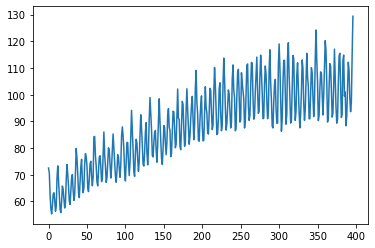

In [499]:
plt.plot(train1)

In [500]:
train1=train1.values.reshape(-1,1)

In [501]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
scale=scale.fit(train1)


In [502]:
scale.data_min_

array([55.3151])

In [503]:
normalize=scale.transform(train1)

In [504]:
normalize[:5]

array([[0.23201741],
       [0.20727443],
       [0.09630353],
       [0.02910391],
       [0.        ]])

In [505]:
res=normalize.flatten()

In [506]:
res[:5]

array([0.23201741, 0.20727443, 0.09630353, 0.02910391, 0.        ])

In [507]:
tt={}

ww=[]
uu=[]
def make(a,b):
        m=0
        k=0
        while k<394:
            qq=[]
            for i in range(b):
                        u=a[m]
                        m=m+1
                        qq.append(u)
            ww.append(qq)  
            uu.append(a[m])
   
            m=k+1
            k=k+1

   
        

In [508]:
make(res,3)

In [509]:
ww[:5]

[[0.2320174059282195, 0.20727442545994923, 0.0963035347693405],
 [0.20727442545994923, 0.0963035347693405, 0.029103910530073773],
 [0.0963035347693405, 0.029103910530073773, 0.0],
 [0.029103910530073773, 0.0, 0.03745864809818378],
 [0.0, 0.03745864809818378, 0.0985980507411961]]

In [510]:
from numpy import array

In [511]:
www=array(ww)

In [512]:
www[:5]

array([[0.23201741, 0.20727443, 0.09630353],
       [0.20727443, 0.09630353, 0.02910391],
       [0.09630353, 0.02910391, 0.        ],
       [0.02910391, 0.        , 0.03745865],
       [0.        , 0.03745865, 0.09859805]])

In [513]:
uu=array(uu)

In [514]:
xtrain,ytrain=www[:325],uu[:325]

In [515]:
xtest,ytest=www[325:],uu[325:]

In [516]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [517]:
model=Sequential()
model.add(Bidirectional(LSTM(50,activation="relu",input_shape=(394,1))))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [518]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

In [519]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,batch_size=40,verbose=0)

In [520]:
y_pred=model.predict(xtest)

In [521]:
y_pred[:5]

array([[0.45460472],
       [0.51012486],
       [0.58232975],
       [0.67366517],
       [0.6407664 ]], dtype=float32)

In [522]:
ypred=scale.inverse_transform(y_pred)

In [523]:
ytest=ytest.reshape(-1,1)

In [524]:
ytest=scale.inverse_transform(ytest)

In [525]:
ypred[:5]

array([[ 88.99663 ],
       [ 93.1101  ],
       [ 98.45973 ],
       [105.226746],
       [102.78929 ]], dtype=float32)

In [526]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest,ypred))

9.301997665667603

lstm=8.333
stacked lstm-7.85
bidirectional-stackedlstm=8.3666
bidirectional-9.30199


In [527]:
train1=pd.read_csv("/kaggle/input/time-series-datasets/monthly-beer-production-in-austr.csv")


In [528]:
train1.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [529]:
trainx=train1["Monthly beer production"]

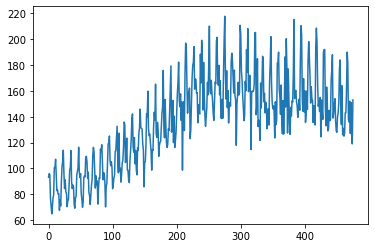

In [530]:
plt.plot(trainx)

In [531]:
trainx=trainx.values.reshape(-1,1)

In [532]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
scale=scale.fit(trainx)

In [533]:
scale.data_min_

array([64.8])

In [534]:
normalize=scale.transform(trainx)

In [535]:
normalize[:5]

array([[0.18562092],
       [0.20392157],
       [0.19869281],
       [0.08039216],
       [0.03986928]])

In [536]:
res=normalize.flatten()

In [537]:
res[:5]

array([0.18562092, 0.20392157, 0.19869281, 0.08039216, 0.03986928])

In [538]:
len(trainx)

476

In [539]:
len(res)

476

In [540]:
tt={}

ww=[]
uu=[]
def make(a,b):
        m=0
        k=0
        mm=476-b
        while k<mm:
            qq=[]
            for i in range(b):
                        u=a[m]
                        m=m+1
                        qq.append(u)
            ww.append(qq)  
            uu.append(a[m])
   
            m=k+1
            k=k+1


In [541]:
make(res,3)

In [542]:
ww[:5]

[[0.1856209150326798, 0.20392156862745098, 0.19869281045751636],
 [0.20392156862745098, 0.19869281045751636, 0.08039215686274509],
 [0.19869281045751636, 0.08039215686274509, 0.039869281045751714],
 [0.08039215686274509, 0.039869281045751714, 0.0],
 [0.039869281045751714, 0.0, 0.03464052287581698]]

In [543]:
uu=array(uu)

In [544]:
www=array(ww)

In [545]:
xtrain,ytrain=www[:325],uu[:325]

In [546]:
xtest,ytest=www[325:],uu[325:]

In [547]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import Bidirectional

In [548]:
model=Sequential()
model.add(LSTM(50,activation="relu",input_shape=(473,1)))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [549]:
xtrain = xtrain.reshape(xtrain.shape[0], xtrain.shape[1], 1)
xtest = xtest.reshape(xtest.shape[0], xtest.shape[1], 1)

In [550]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=50,verbose=2)

Epoch 1/50
11/11 - 0s - loss: 0.2438 - val_loss: 0.3507
Epoch 2/50
11/11 - 0s - loss: 0.1951 - val_loss: 0.2810
Epoch 3/50
11/11 - 0s - loss: 0.1517 - val_loss: 0.2148
Epoch 4/50
11/11 - 0s - loss: 0.1102 - val_loss: 0.1464
Epoch 5/50
11/11 - 0s - loss: 0.0695 - val_loss: 0.0803
Epoch 6/50
11/11 - 0s - loss: 0.0388 - val_loss: 0.0351
Epoch 7/50
11/11 - 0s - loss: 0.0269 - val_loss: 0.0210
Epoch 8/50
11/11 - 0s - loss: 0.0234 - val_loss: 0.0229
Epoch 9/50
11/11 - 0s - loss: 0.0213 - val_loss: 0.0254
Epoch 10/50
11/11 - 0s - loss: 0.0185 - val_loss: 0.0210
Epoch 11/50
11/11 - 0s - loss: 0.0166 - val_loss: 0.0224
Epoch 12/50
11/11 - 0s - loss: 0.0157 - val_loss: 0.0214
Epoch 13/50
11/11 - 0s - loss: 0.0152 - val_loss: 0.0211
Epoch 14/50
11/11 - 0s - loss: 0.0151 - val_loss: 0.0207
Epoch 15/50
11/11 - 0s - loss: 0.0151 - val_loss: 0.0206
Epoch 16/50
11/11 - 0s - loss: 0.0148 - val_loss: 0.0201
Epoch 17/50
11/11 - 0s - loss: 0.0148 - val_loss: 0.0205
Epoch 18/50
11/11 - 0s - loss: 0.0147 - 

In [551]:
y_pred=model.predict(xtest)

In [552]:
y_pred[:5]

array([[0.5476296 ],
       [0.5095289 ],
       [0.47329512],
       [0.4379035 ],
       [0.5180853 ]], dtype=float32)

In [553]:
ypred=scale.inverse_transform(y_pred)

In [554]:
ytest=ytest.reshape(-1,1)

In [555]:
ytest=scale.inverse_transform(ytest)

In [556]:
ypred[:5]

array([[148.58733],
       [142.75792],
       [137.21416],
       [131.79924],
       [144.06705]], dtype=float32)

In [557]:
ytest[:5]

array([[137.3],
       [135.5],
       [121.7],
       [166.1],
       [146.8]])

In [558]:
from keras.layers import Bidirectional

In [559]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ytest,ypred))

21.00697255730517


20.93-bidirectional
20.79-bidirectional+stackedlstm
21.03619-stackedlstm
21.5480163-lstm